# EasyWordCloud
A small utility to build wordclouds from any text and with any shape.

Actually, a slightly modified (and interactive!) version of [this wonderful Python library](https://github.com/amueller/word_cloud) by Andreas Mueller et al.

Before using it, check out the reference piece (including several tips to make better wordclouds) in [my Medium blog](https://medium.com/@luca.giovannini7). 

by @LucaGiovannini

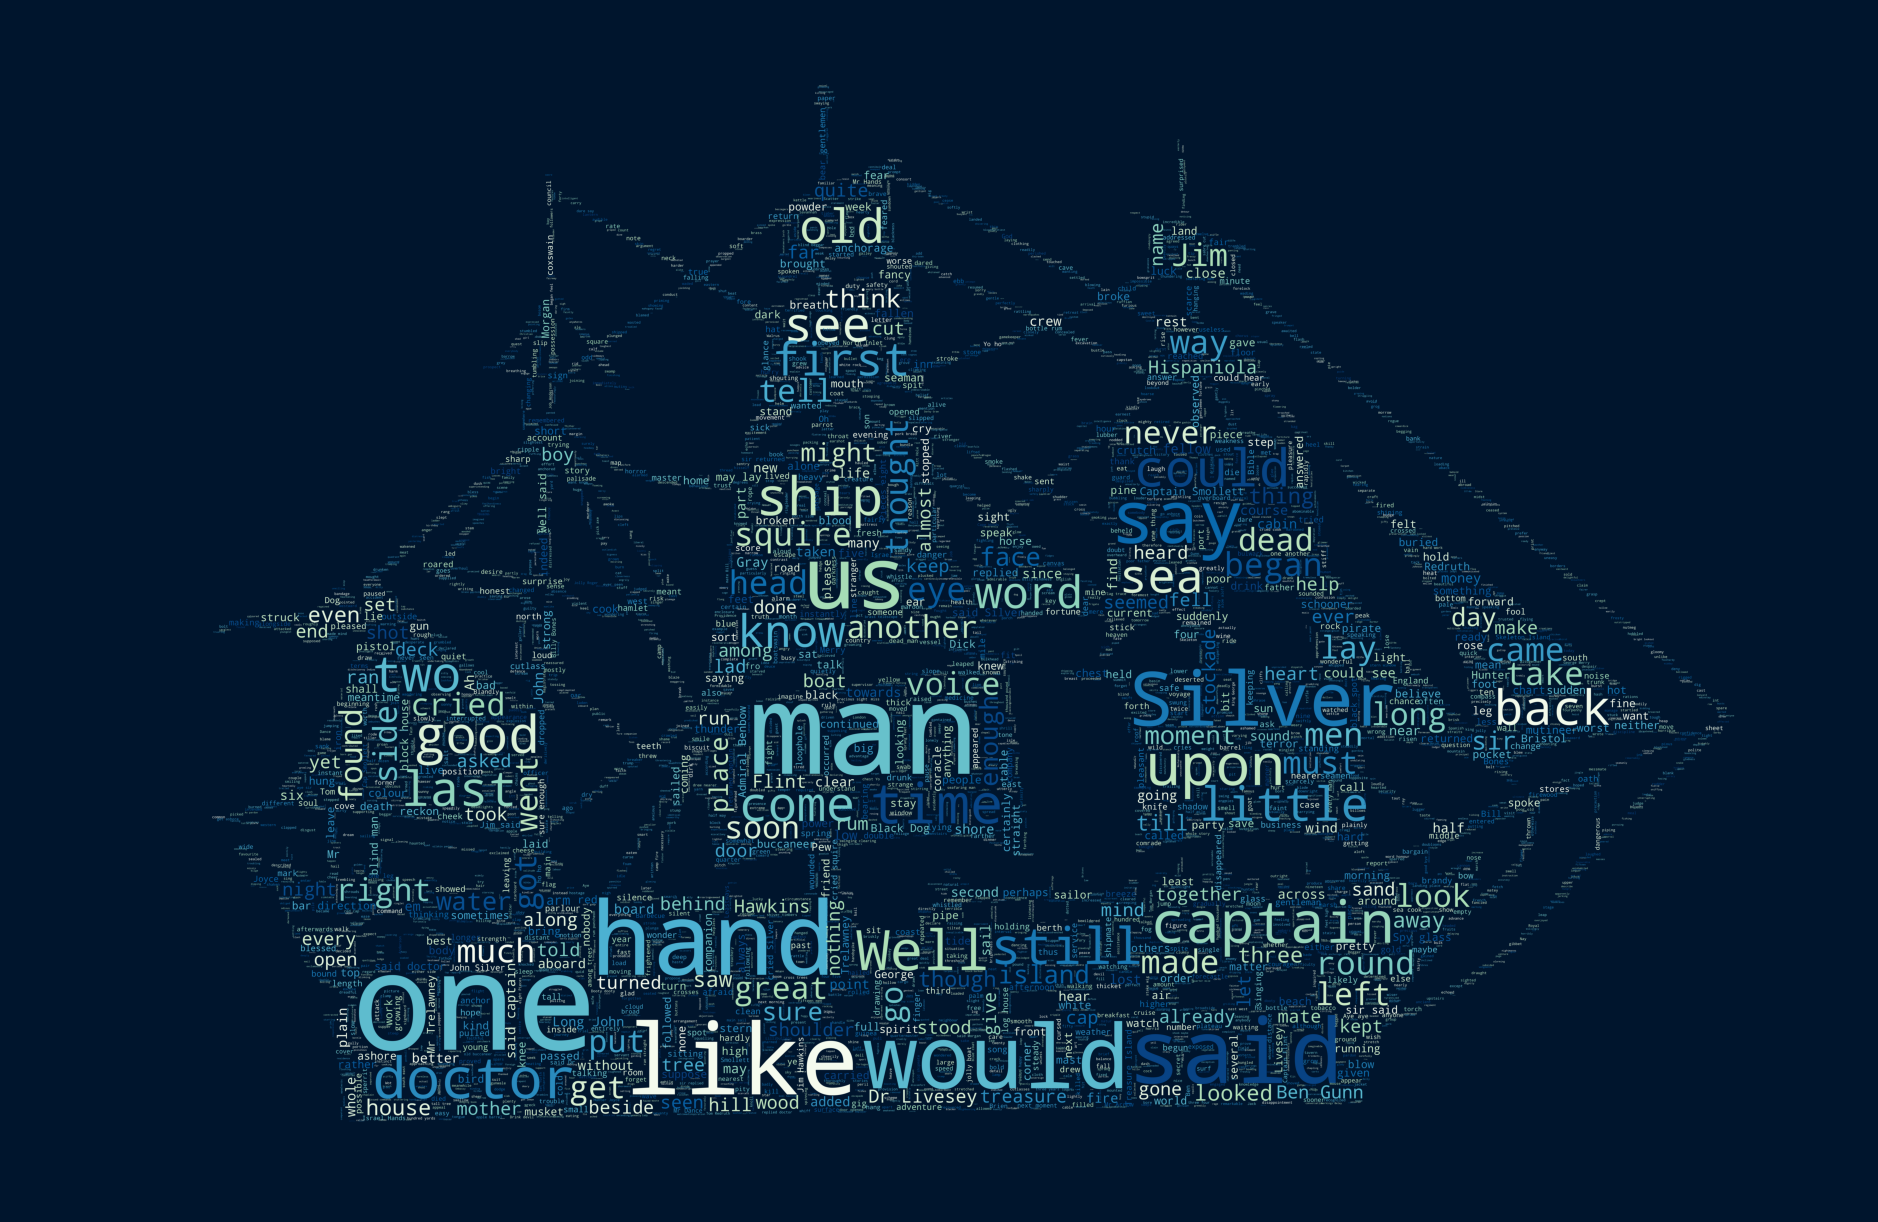

# The lines of code below will do the trick...
...you can ignore them. Just hover the mouse over the square brackets and press the triangle to run the code for this session (**this will require signing in your Google Account**), then jump to the cell "Run EasyWordCloud!".

PRESS 

HERE!

↓↓↓ 


In [ ]:
def WordCloudBuilder():

  #imports
  import requests
  from bs4 import BeautifulSoup
  import re
  import sys
  import urllib.request
  !pip install Pillow
  from PIL import Image
  import numpy as np
  from os import path
  from PIL import Image
  import matplotlib.pyplot as plt
  from wordcloud import WordCloud, STOPWORDS
  from google.colab import files
  import nltk
  nltk.download('stopwords')


  # choose text from url (url must be .txt) 

  print(' ')
  print('Welcome to the EasyWordCloud utility. Follow the instructions')
  print('displayed to draw your customised wordcloud! Remember to press')
  print('<enter> after inserting a reply.')
  print(' ')
  print('---------------------- 1. TEXT SELECTION ----------------------------')
  print(' ')
  print('Remember the utility works best with plain .txt/.html/.htm files')
  print('You can upload text from a webpage or from your pc.')
  print(' ')
  reply = input('Do you want to upload the text from your pc (yes/no)? ').lower()
  if reply == 'no':
    text_url = input('Ok, in this case just paste the text url: ')
    response = requests.get(text_url)
    document = response.text
  else:
    upload = files.upload()
    filename = input("Insert the file's full name (e.g. hamlet.txt): ")
    with open(filename) as file:
      document = file.read().replace('\n', '')
 

  # choose mask image (url must be image)

  print(' ')
  print('---------------------- 2. IMAGE SELECTION ----------------------------')
  print(' ')
  print('Remember to choose a black/white image (such as an icon) for optimal results.')
  print('Sometimes images with transparent backgrounds (.png) are not processed correctly.') 
  print(' ')
  reply = (input('Do you want to upload the image from your pc (yes/no)? '))
  if reply == 'yes':
    image_file = files.upload()
  else:
    image_url = input('Ok, in this case just paste the image url: ')
    image_file = Image.open(urllib.request.urlopen(image_url))
  print(' ')
  print('Upload completed.')
  print(' ')

  #stopwords removal
  print('---------------------------STOPWORDS------------------------------')
  print(' ')
  print('Stopwords removal is available in 21 languages.') 
  reply = input('Please insert your text\'s language:   ').lower()
  stopwords = nltk.corpus.stopwords.words(reply)
  
  print('If you\'d like to add text-specific stopwords,')
  print('you can do it here. If not, press enter.')
  reply = input('Add stopwords separated by commas: ')
  add_sw = reply.split(',')

  stopwords = list(stopwords) + add_sw
  
  # define parameters
  print(' ')
  print('---------------------------- 3. PARAMETERS-----------------------------')
  print(' ')
  print('Choose words\' colormap, all options available here:')
  print('https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html')
  colormap = (input('Insert colormap name exactly as it appears in documentation (e.g. Blues): '))

  print(' ')
  print('Choose your background color. You may insert common color names (e.g. black) or')
  print('HEX color codes (e.g. #cce0eb) which you can find here: https://www.color-hex.com/ ') 
  background_color = (input('Insert color name or HEX code: '))

  print(' ')
  reply = (input('Do you want to contour the image (yes/no)? ')).lower()
  if reply == 'y':
    contour_width = 1
    reply = input('Insert contour color using its name or HEX code: ')
    contour_color = reply 
  else:
    contour_width = 0
    contour_color = None
  print(' ')
  print('PREPARING YOUR WORDCLOUD.........')
  print('If you\'re not satisfied for the result, here\'s what you can do:')
  print('1. Strange words popping out? Insert them as stopwords!')
  print('2. Blurry/ugly image? Change parameters or load it manually!')
  print('2. Image shape not recognised? You used a .png, turn it to .jpg!')

  # create mask
  mask = np.array(image_file)

  # generate word cloud
  wc = WordCloud(scale=5,background_color=background_color, min_font_size=1, 
                max_words=5000, mask=mask, stopwords=stopwords,colormap=colormap, 
                contour_width=contour_width, contour_color=contour_color,repeat=True)
  wc.generate(document)

  # plot the word cloud
  plt.figure(figsize=(10,4), dpi=450)
  plt.imshow(wc)
  plt.axis("off")
  img = plt.show()

  return img


# Run EasyWordCloud!
Press the run icon and follow on-screen instructions. If an error occurs or you don't like the output, run it again changing text, image or parameters.

PRESS

HERE

↓↓↓ 

In [ ]:
WordCloudBuilder()

### Remember to save your output (right click on the generated image)! 

### You can't modify this notebook, unless you copy it in your Colab notebooks (File > Save a copy in Drive).